<a href="https://colab.research.google.com/github/angelaomo/Heart_Disease_Prediction/blob/main/Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXPLANATION OF FEATURES**
CRIM : per capita crime rate by town

ZN : proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS : proportion of non-retail business acres per town.

CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX : nitric oxides concentration (parts per 10 million)

RM : average number of rooms per dwelling

AGE : proportion of owner-occupied units built prior to 1940

DIS : weighted distances to five Boston employment centres

RAD : index of accessibility to radial highways

TAX : full-value property-tax rate per $10,000

PTRATIO : pupil-teacher ratio by town

B : 1000(Bk – 0.63)2 where Bk is the proportion of blacks by town

LSTAT : % lower status of the population

MEDV : Median value of owner-occupied homes in $1000’s


#**IMPORT LIBRARIES**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [ ]:
#Read the file
df=pd.read_csv(r'https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Boston.csv')
df.head(2)

CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   

   PTRATIO      B  LSTAT  MEDV  
0     15.3  396.9   4.98  24.0  
1     17.8  396.9   9.14  21.6

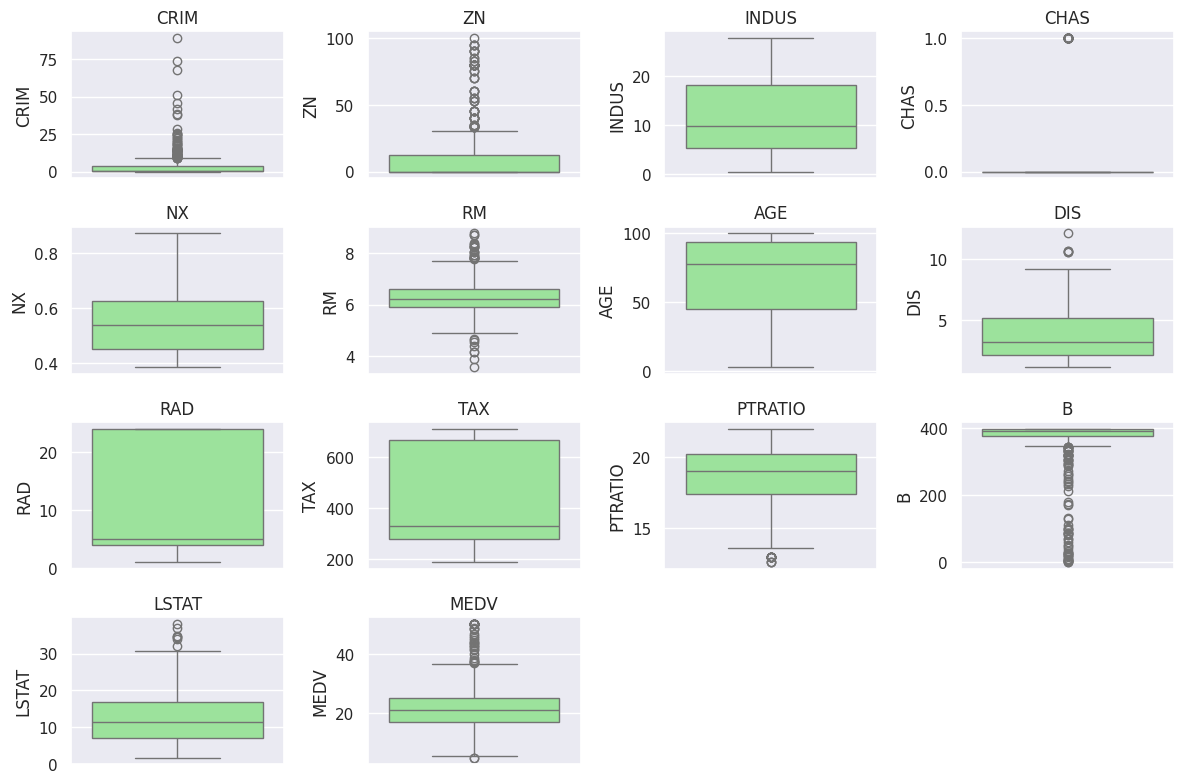

In [ ]:
# Box Plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
# Display data types of each column
df.dtypes



CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NX         float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
# Display summary statistics for numerical variables
df.describe()


CRIM          ZN       INDUS        CHAS          NX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [ ]:
# Display the shape of the DataFrame
print(df.shape)


(506, 14)


In [ ]:
# Check for missing values
print(df.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


#**CORRELATION ANALYSIS**

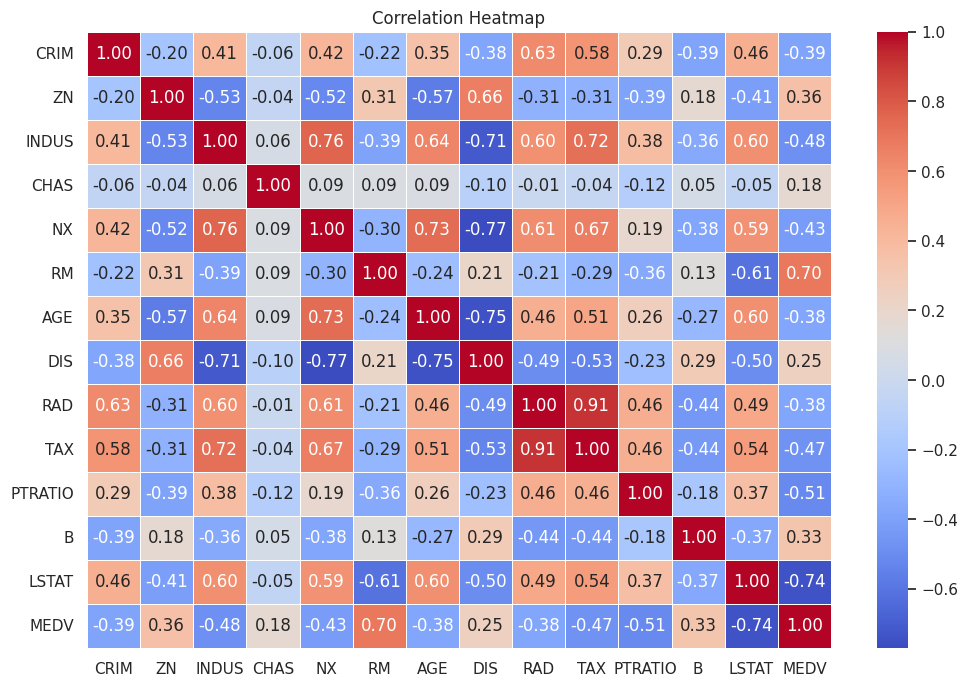

In [ ]:
#the more value to 1,the more correlated,the more value to -1,the more uncorrelate
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()].sum()
duplicate_rows



CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NX         0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

In [ ]:
#check column headers
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

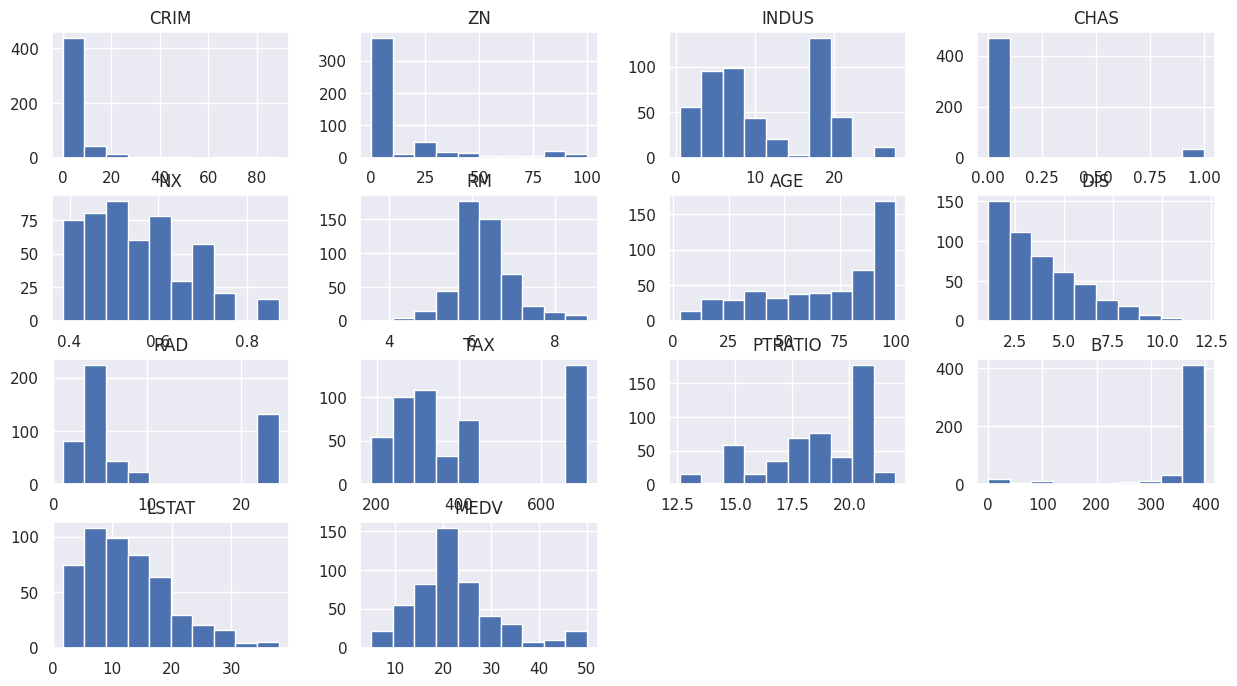

In [ ]:
df.hist(figsize=(15,8))

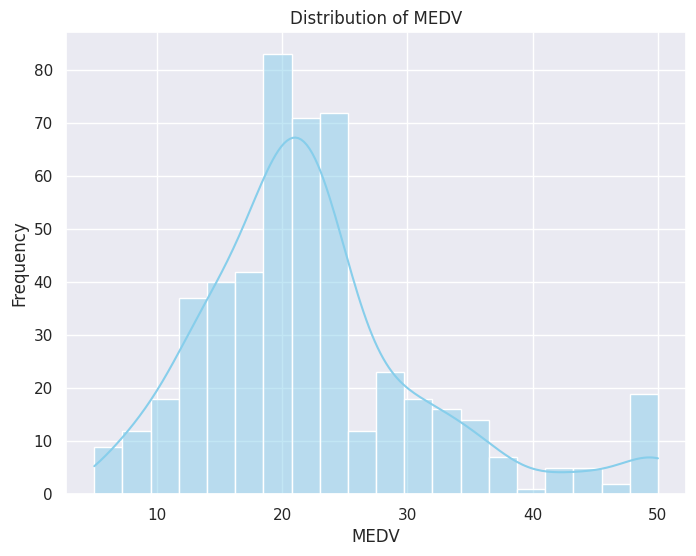

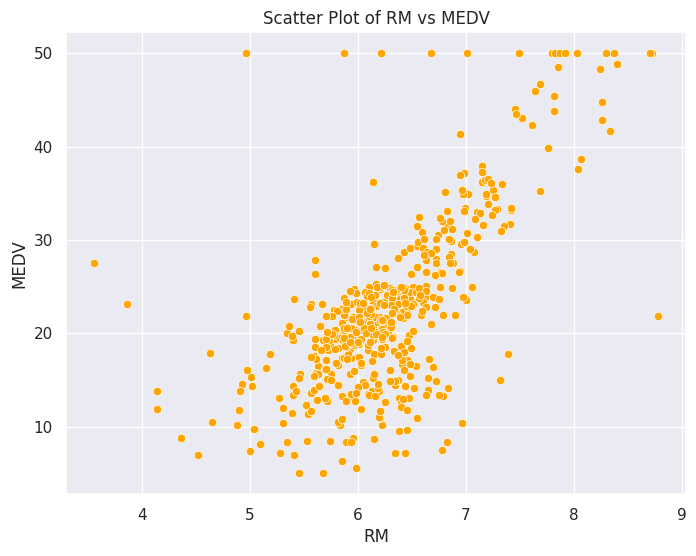

<ipython-input-81-6a3dcc45f7af>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='CHAS', y='MEDV', palette='Set2')


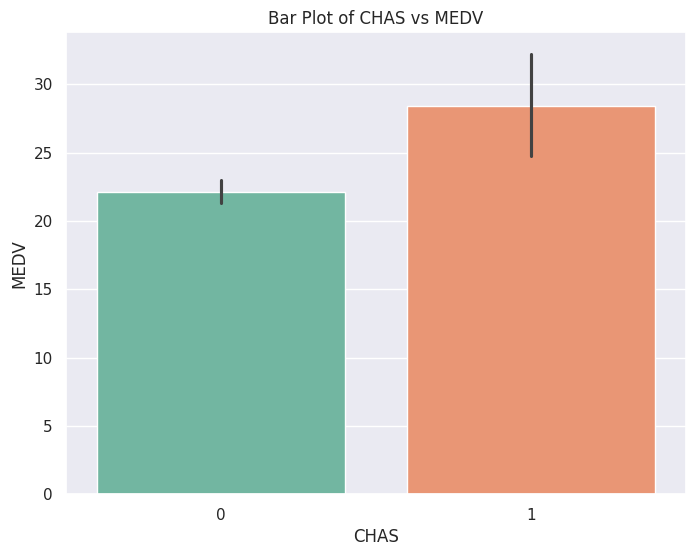

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the target variable (MEDV)
plt.figure(figsize=(8, 6))
sns.histplot(df['MEDV'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of RM (average number of rooms) against MEDV
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='RM', y='MEDV', color='orange')
plt.title('Scatter Plot of RM vs MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

# Bar plot of CHAS (Charles River dummy variable) against MEDV
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='CHAS', y='MEDV', palette='Set2')
plt.title('Bar Plot of CHAS vs MEDV')
plt.xlabel('CHAS')
plt.ylabel('MEDV')
plt.show()


<ipython-input-82-84a3eeeecf06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='CHAS', y='MEDV', palette='Set2')


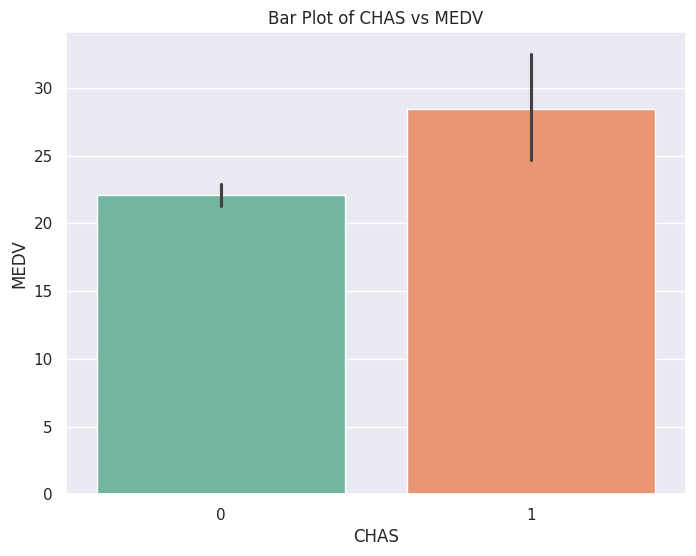

In [ ]:
# Bar plot of CHAS (Charles River dummy variable) against MEDV
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='CHAS', y='MEDV', palette='Set2')
plt.title('Bar Plot of CHAS vs MEDV')
plt.xlabel('CHAS')
plt.ylabel('MEDV')
plt.show()


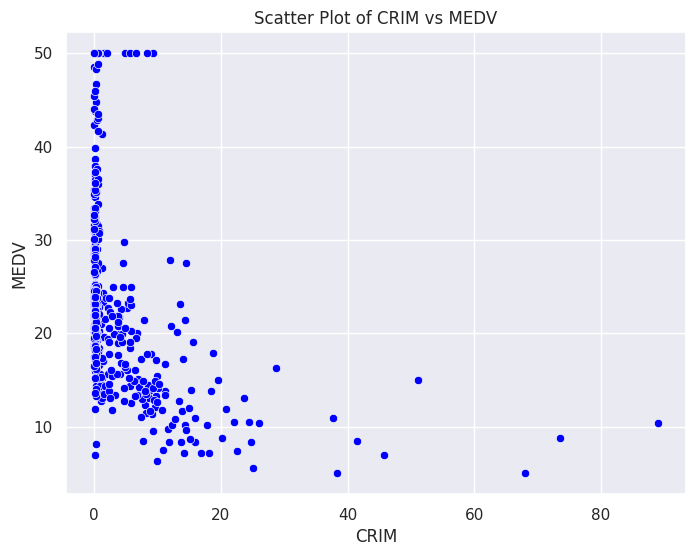

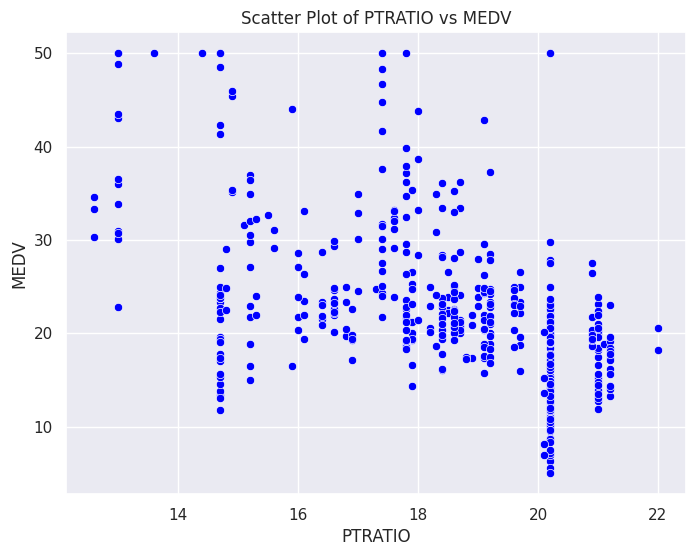

In [ ]:
# Scatter plot of RM (average number of rooms) against MEDV
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CRIM', y='MEDV', color='blue')
plt.title('Scatter Plot of CRIM vs MEDV')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.show()

# Scatter plot of PTRATIO(PUPILS-TEACHER RATIO) against MEDV
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PTRATIO', y='MEDV', color='blue')
plt.title('Scatter Plot of PTRATIO vs MEDV')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.show()

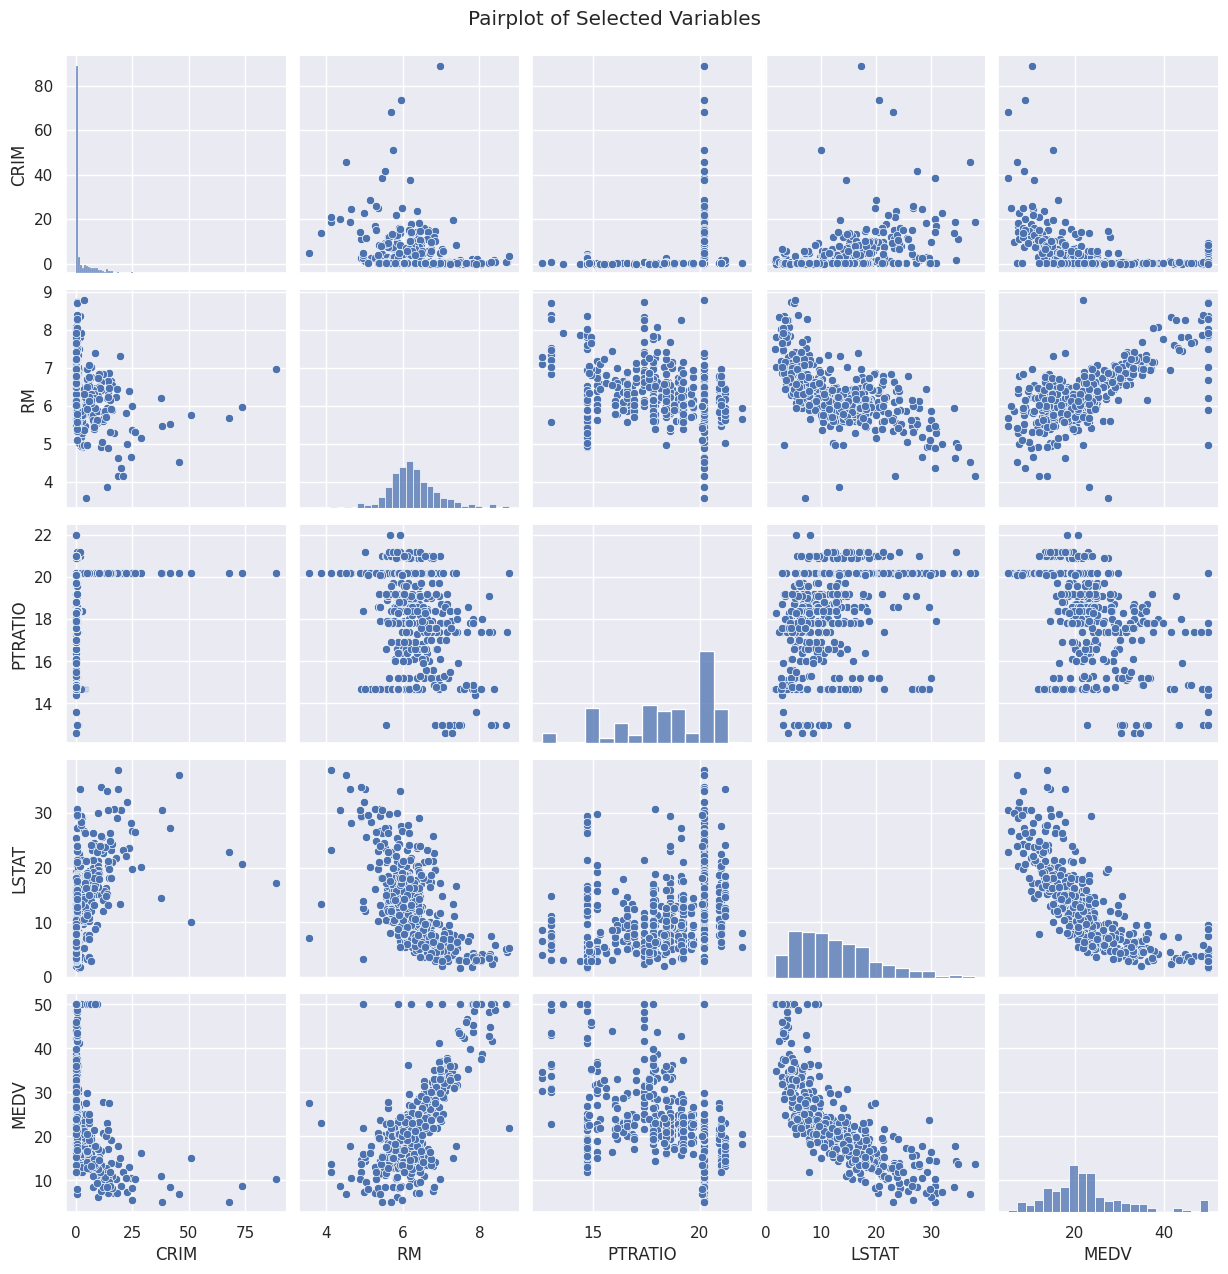

In [ ]:
selected_columns = ['CRIM', 'RM', 'PTRATIO', 'LSTAT', 'MEDV']
sns.pairplot(df[selected_columns])
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()


#**CORRELATION**

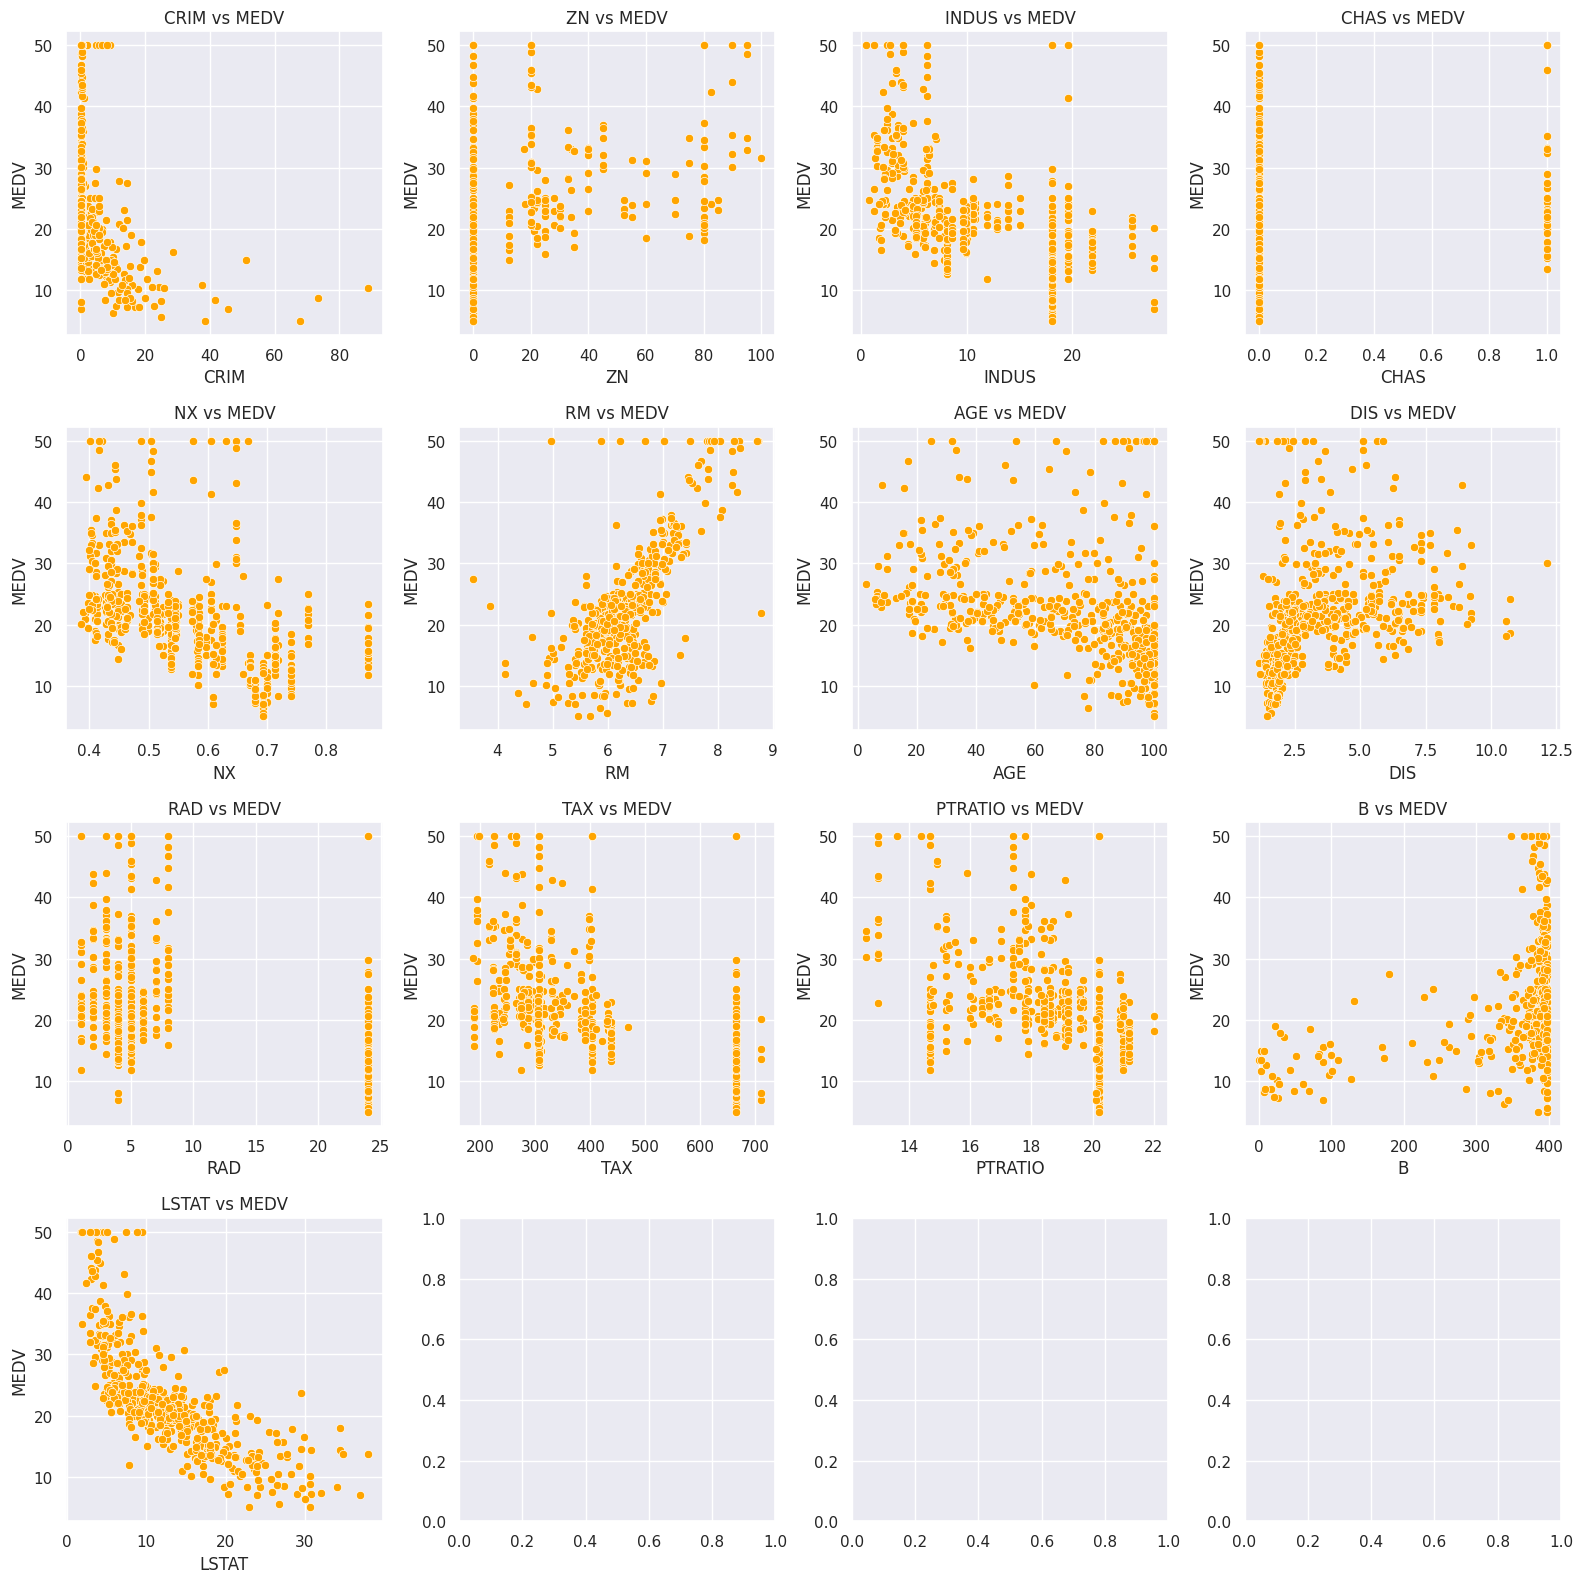

In [ ]:
# Scatter plots to visualize relationships between features and the target variable
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(ax=axes[i//4, i%4], data=df, x=feature, y='MEDV', color='orange')
    axes[i//4, i%4].set_title(f'{feature} vs MEDV')

plt.tight_layout()
plt.show()

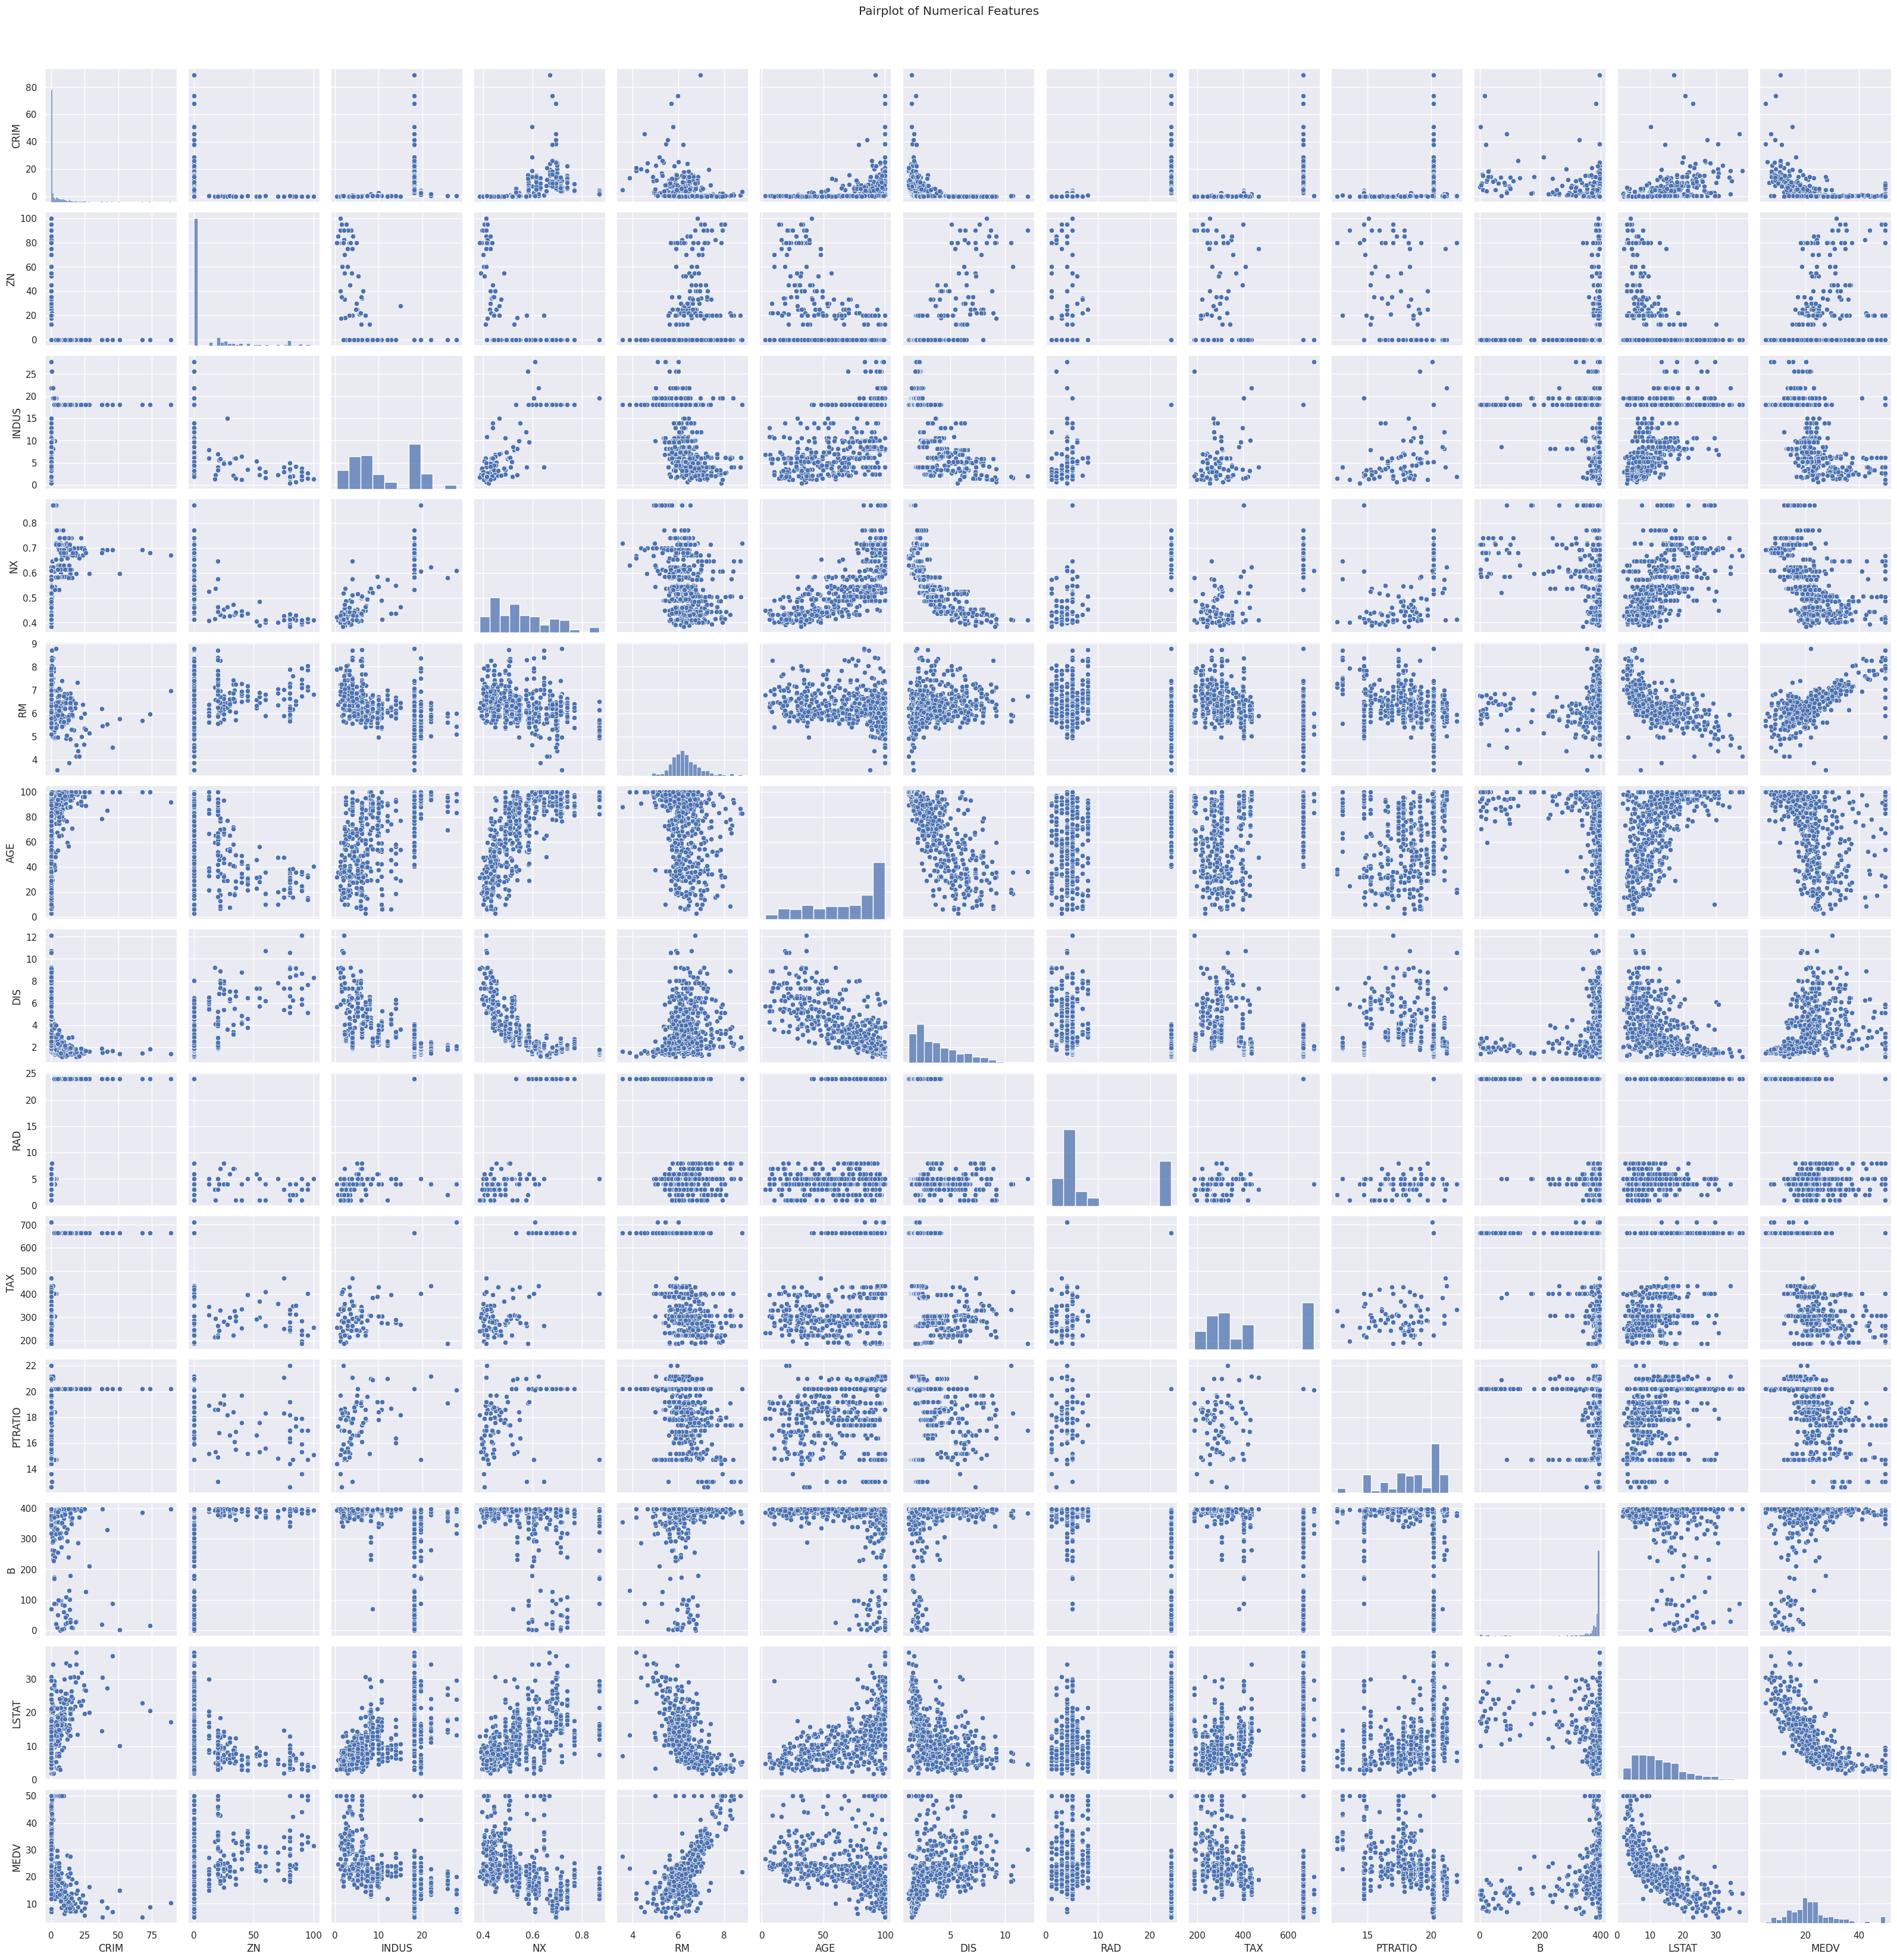

In [ ]:
# Pairplot for visualizing relationships between multiple variables
sns.pairplot(df, vars=['CRIM', 'ZN', 'INDUS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

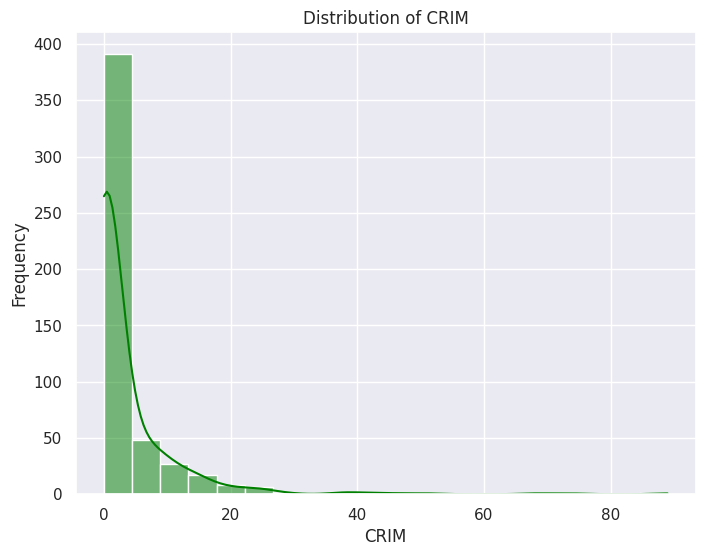

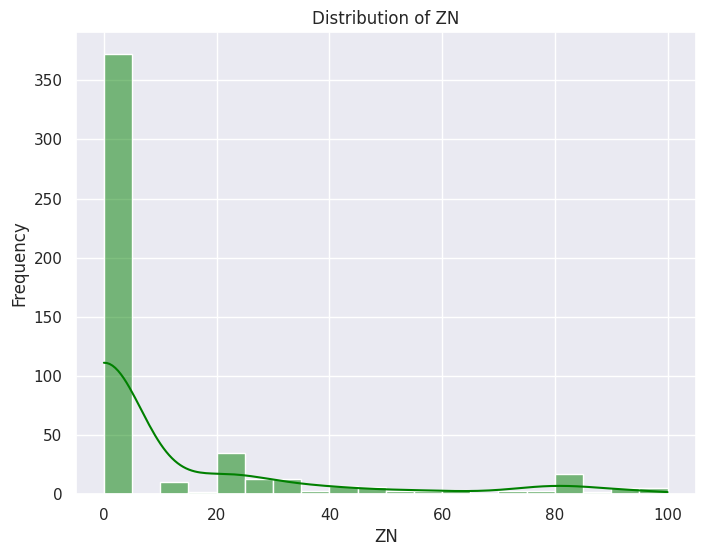

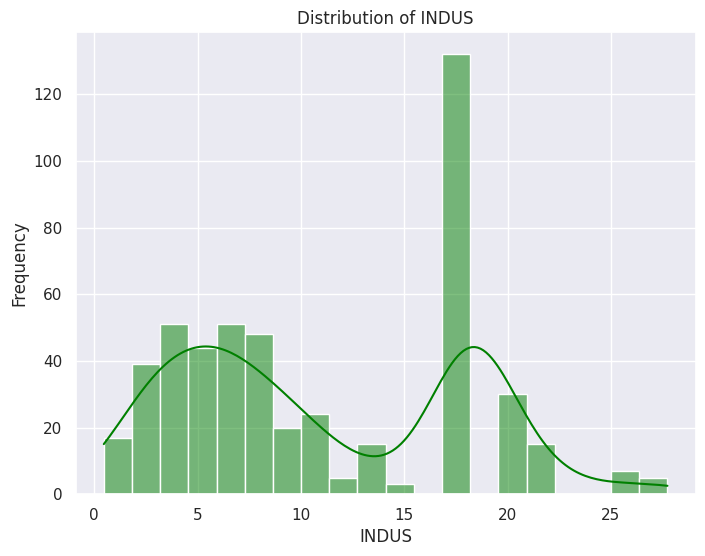

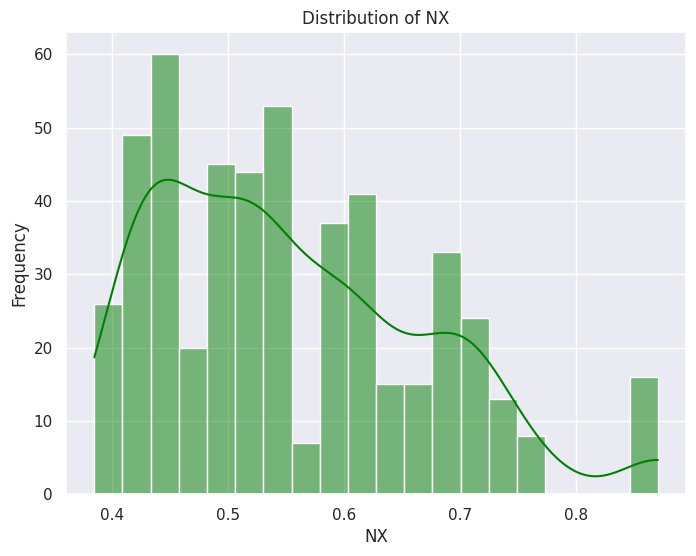

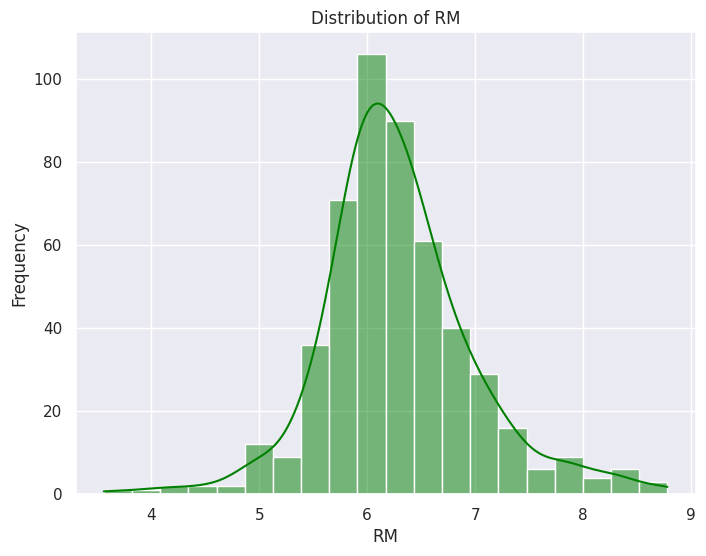

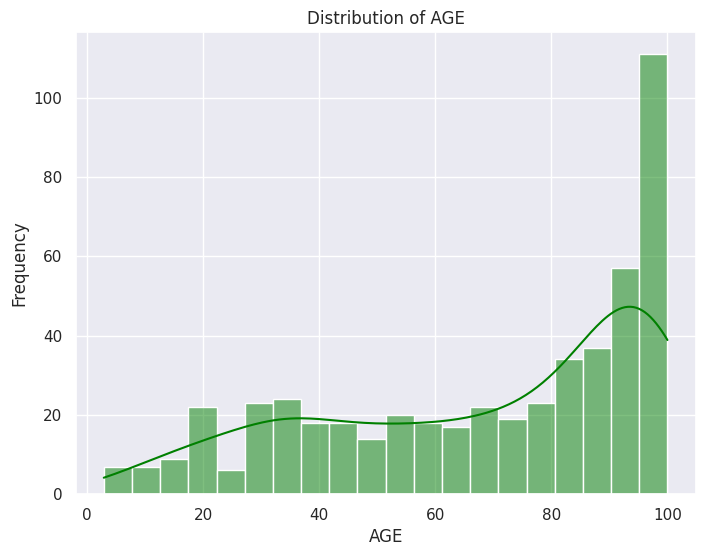

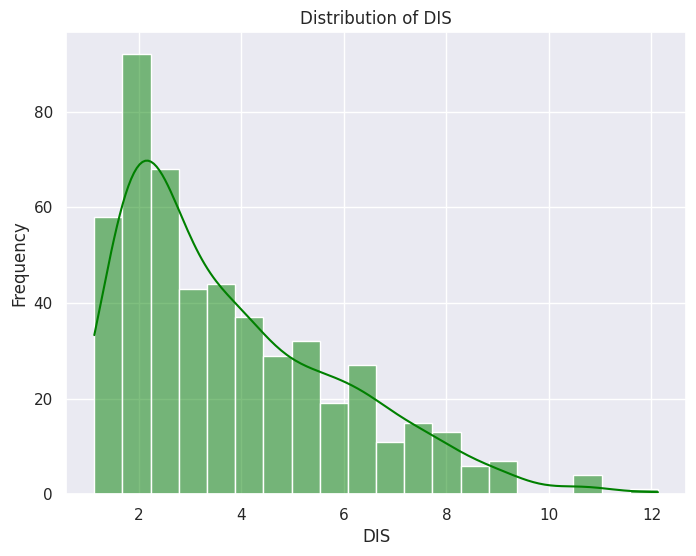

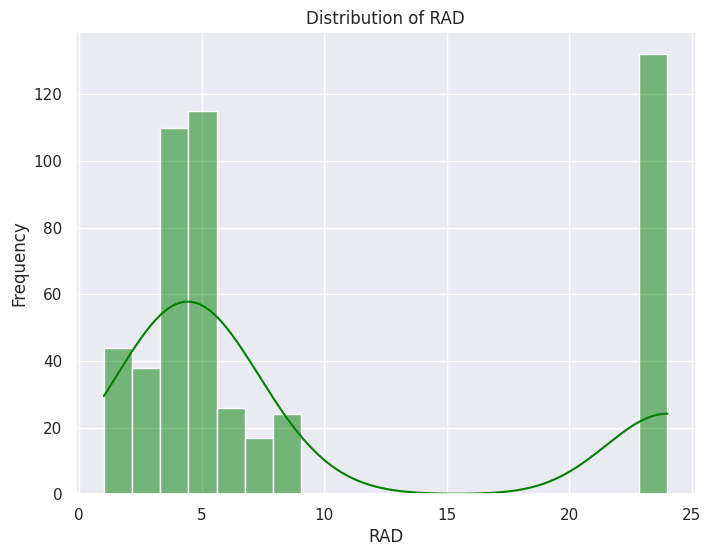

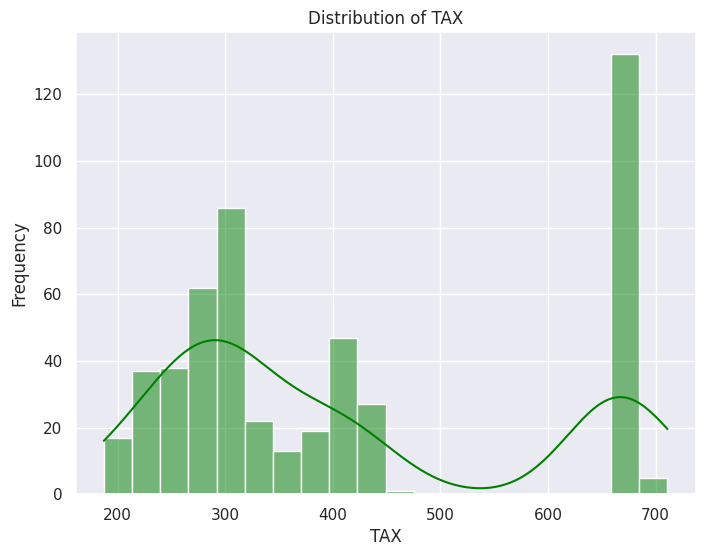

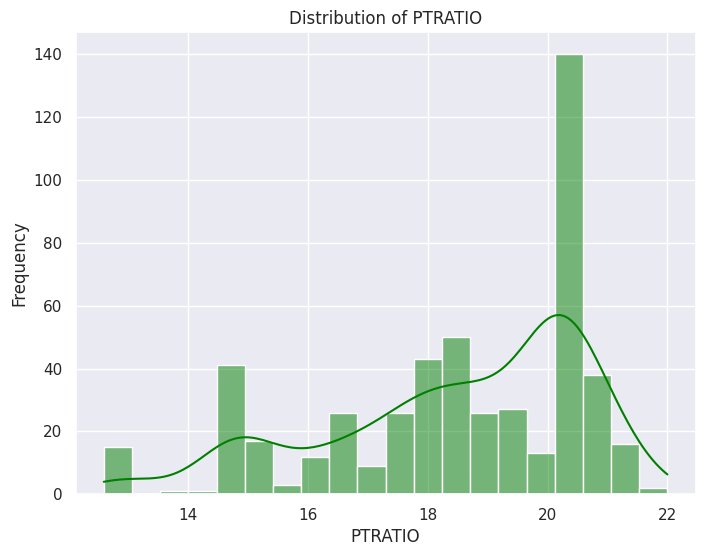

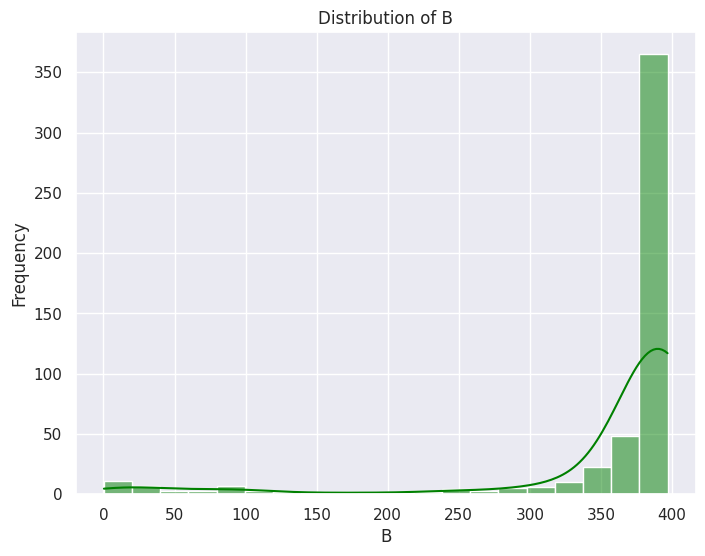

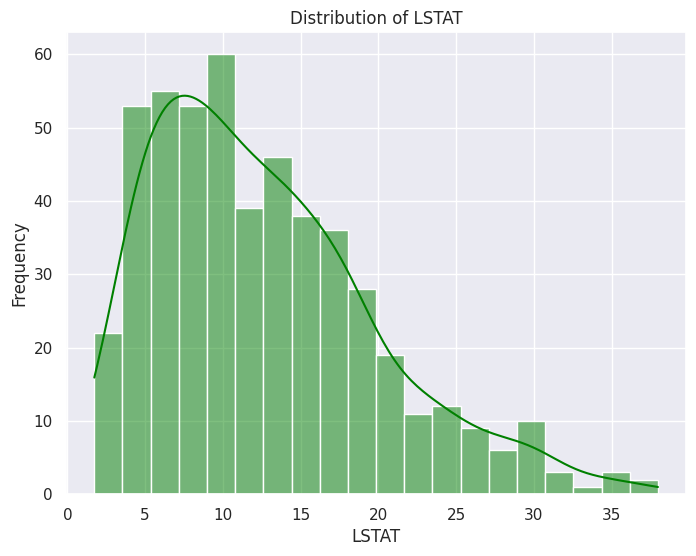

In [ ]:
# Distribution of numerical features
numerical_features = ['CRIM', 'ZN', 'INDUS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, color='green', bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-88-b66bdb858ed5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'], bins=20, color='green')


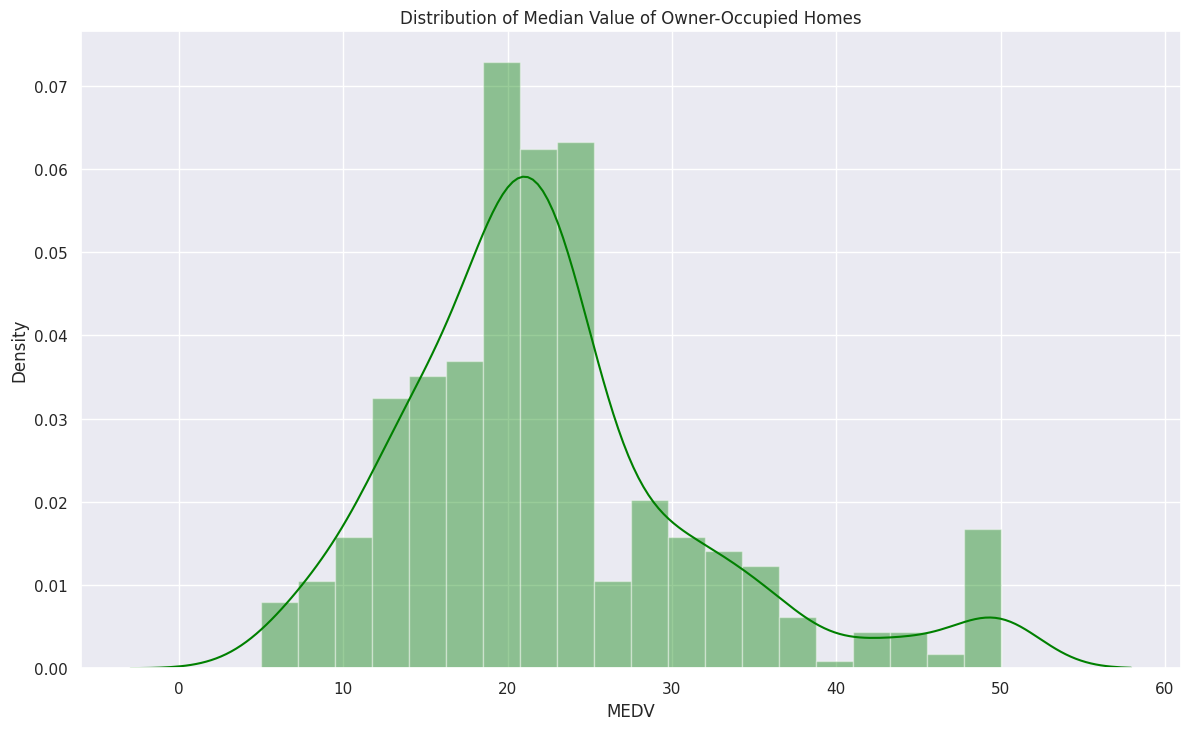

In [ ]:
# Distribution of Median Value of Owner-Occupied Homes
sns.set(rc={'figure.figsize':(14.2,8.27)})
sns.distplot(df['MEDV'], bins=20, color='green')
plt.title('Distribution of Median Value of Owner-Occupied Homes')
plt.show()


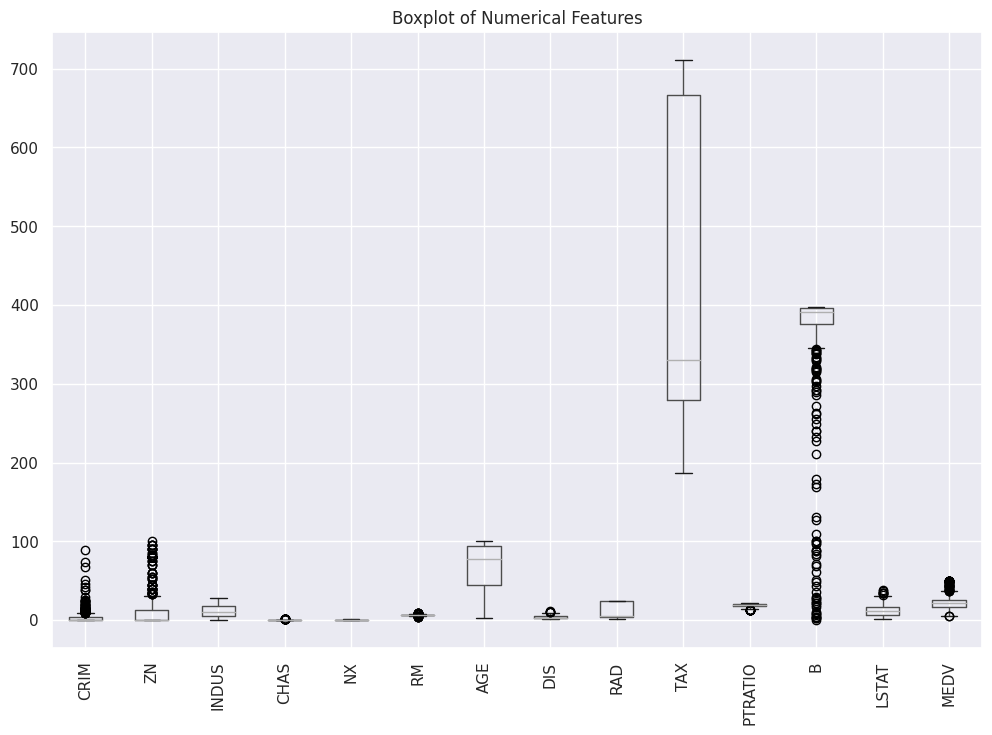

In [ ]:
# Outlier detection using boxplots
plt.figure(figsize=(12, 8))
df.boxplot(rot=90)
plt.title('Boxplot of Numerical Features')
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming your data is in a DataFrame called 'df'
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Get the feature names
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']

# Print the coefficients rounded to 2 decimal places
print("Coefficients:")
for coef, name in zip(regression.coef_.round(2), feature_names):
    print(f"{name}: {coef}")

# Print the intercept rounded to 2 decimal places
print(f"Intercept: {regression.intercept_.round(2)}")

Coefficients:
CRIM: -0.11
ZN: 0.03
INDUS: 0.04
CHAS: 2.78
NX: -17.2
RM: 4.44
AGE: -0.01
DIS: -1.45
RAD: 0.26
TAX: -0.01
PTRATIO: -0.92
B: 0.01
Intercept: 30.25


In [ ]:
# Assuming you have already trained a linear regression model named 'regression'

# Get the coefficient values
print(regression.coef_).round(2)


[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


AttributeError: 'NoneType' object has no attribute 'round'

In [ ]:
#Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)


In [ ]:
#stadardise the data since they are not in the same scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)#dont fit the test set so that the model does not know much about the train data

In [ ]:
#verify the correctness of the splitting process by printing the sizes

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [ ]:
#Training the model
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Get the column names as a list
column_names = list(df.columns)
print(column_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [ ]:
# Assuming you have already trained a linear regression model named 'regression'

# Get the coefficient values
coefficients = regression.coef_

# List of column names'CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
columns_of_interest = []

# Print the coefficient values for the specified columns
for feature, coef in zip(columns_of_interest, coefficients):
    print(f'{feature}: {coef}')


CRIM: -5.042022109238708
ZN: 3.1761917906268335


In [ ]:

# model evaluation for training set
# Import the necessary libraries
from sklearn.metrics import r2_score,mean_square_error

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

ImportError: cannot import name 'mean_square_error' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

#**MODEL BUILDING**

In [ ]:
# Split Data

X = df.drop(columns=['MEDV'])  # Features
y = df['MEDV']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Choose Model (Linear Regression)
from sklearn.linear_model import LinearRegression

In [ ]:
#Train Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
# Evaluate Model

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# Evaluate model performance
#y_pred = regressor.predict(X_test)
#r2 = r2_score(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred)
#rmse=np.sqrt(mse)
#mae = mean_absolute_error(y_test, y_pred)


print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2.round(2))
print("Mean Squared Error:", mse.round(2))
print("Root Mean Squared Error:", rmse.round(2))

In [ ]:
#Predict on the test set
y_pred = regressor.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

R-squared value of approximately 0.67 suggests that around 67% of the variance in the target variable (MEDV) is explained by the independent variables (features) included in the model.

The MSE value of approximately 24.29 suggests that, on average, the squared difference between the actual and predicted MEDV (target variable) values is around 24.29.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

In [ ]:
#Model Interpretation
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': regressor.coef_})
print("Coefficients:\n", coefficients)

In [ ]:
#Model Validation
# To visualize residuals to check for homoscedasticity and normality.
import seaborn as sns
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()


In [ ]:
#Feature Engineering
# Explore additional feature engineering techniques, such as polynomial features or interaction terms.
# Example:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [ ]:
# Model Deployment
# If the model meets the desired performance criteria, deploy it for predictions on new data.
# Serialize the trained model using pickle or joblib for future use.
# Example:
import joblib
joblib.dump(regressor, 'linear_regression_model.pkl')

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Model: {name}")
    print(f"MSE: {mse}")
    print(f"R-squared: {r2}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print("="*50)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary to store the scores for each model
scores_map = {
    "Linear Regression": [24.29111947497323, 0.668759493535636, 3.1890919658878016, 4.9286021826653075],
    "Ridge Regression": [24.477191227708634, 0.6662221670168524, 3.132947427805533, 4.947442897872459],
    "Lasso Regression": [24.4094897612997, 0.6671453631686304, 3.2535397673681623, 4.94059609372186],
    "Decision Tree": [9.019509803921569, 0.8770074389288899, 2.2852941176470587, 3.0032498737070763],
    "Random Forest": [9.194839529411759, 0.874616593701297, 2.1505294117647042, 3.032299379911515],
    "Gradient Boosting": [6.238501367579736, 0.9149300486251872, 1.9238714765210723, 2.4976992147934336],
    "Support Vector Machine": [52.8383657679667, 0.27948125010200275, 4.530585721759495, 7.269000327965785]
}

# Convert the dictionary to a DataFrame
scores_df = pd.DataFrame(scores_map)

# Plotting
plt.figure(figsize=(20, 10))
sns.boxplot(data=scores_df)
plt.title('Performance Scores of Regression Models')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Plotting
plt.figure(figsize=(12, 8))
scores_df.plot(kind='bar', figsize=(12, 8))
plt.title('Performance Scores of Regression Models')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()
